In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import imageio

In [14]:
class particle:
    def __init__(self,pos, vel, m):
        self.pos=pos
        self.vel=vel
        self.m=m
    def

        
        

SyntaxError: invalid syntax (Temp/ipykernel_15052/2304867090.py, line 6)

[5.84842877 5.51936131 3.70000713 4.15296408 5.57047295 3.82315593
 3.37335712 5.04328158 4.16680723 5.80509997 6.60793033 5.75417725
 4.22110956 7.19336878 4.66641349 4.5689299  5.35763972 5.35696392
 5.3145533  5.05874274 3.38519629 4.00363446 4.76131382 5.18722935
 4.71103941] 25


In [18]:
########################################
#### Initializing pos and vel lists
##input: box length, lin density
##output: initpos_x, initpos_y, initvel_x, initvel_y
########################################
def initialize_pos_vel(box_l, lin_density):
    pos_x=np.arange(0,box_l,1/lin_density)
    pos_y=np.arange(0,box_l,1/lin_density)
    initpos_x, initpos_y= np.meshgrid(pos_x,pos_y)
    initpos_x=initpos_x.flatten()
    initpos_y=initpos_y.flatten()
    print(initpos_x,initpos_y, len(initpos_x))
    area_density=lin_density**2
    initvel_x=np.zeros(int((box_l**2)*area_density))
    initvel_y=np.zeros(int((box_l**2)*area_density))
    #print(initvel_x,initvel_y, len(initvel_x))
    print("length of vel and pos: {}, {}".format(len(initpos_x),len(initvel_x)))
    return initpos_x, initpos_y, initvel_x, initvel_y
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

########################################
## Calculates net forces on each particles and returns list of net forces for particles (list_f)
########################################
def calc_netforce(initpos_x, initpos_y):
    list_fx=np.zeros(len(initpos_x))
    list_fy=np.zeros(len(initpos_x))
    list_f=np.zeros(len(initpos_x))
    for i in range(len(initpos_x)):
        r_x=initpos_x-initpos_x[i]
        r_y=initpos_y-initpos_y[i]
        r=np.sqrt(r_x**2+r_y**2)
        #print(r)
        r_x=r_x[r!=0]
        r_y=r_y[r!=0]
        r=r[r!=0] #gets rid of all values that are r_i=0 in the list of r, so we dont have to worry by dividing zero when caluclating the force. 
        #print(len(r), r)
        f_x=G*(m**2)*r_x/(r**(3))
        f_y=G*(m**2)*r_y/(r**(3))
        f=G*(m**2)*r/(abs(r**3))
        #print("f_c: {},  f: {}".format(np.sqrt(f_x**2+f_y**2),np.abs(f)))
        #print("check", np.around(np.abs(f),3)==np.around(np.sqrt(f_x**2+f_y**2),3))
        list_fx[i]=np.sum(f_x)
        list_fy[i]=np.sum(f_y)
        list_f[i]=np.sum(f)
    return(list_fx,list_fy)
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

########################################
## Basic Kinematic Functions to be used in function calc_new_pos_vel(...)
########################################
def vel_next(a,vi,dt):
    vf=vi+a*dt
    return vf

def pos_next(a,vi,xi,dt):
    xf=xi+(vi*dt)+(.5*a*dt**2)
    return xf
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

########################################
## usinf list_fx and list_fy, calculate the new position and velocity of each particle assumming constant acceleration
########################################
def calc_new_pos_vel(initpos_x, initpos_y, initvel_x, initvel_y, list_fx, list_fy):
    newvel_x=vel_next(list_fx/m,initvel_x,dt)
    newvel_y=vel_next(list_fy/m,initvel_y,dt)
    newpos_x=pos_next(list_fx/m,initvel_x,initpos_x,dt)
    newpos_y=pos_next(list_fy/m,initvel_y,initpos_y,dt)
    return newpos_x, newpos_y, newvel_x, newvel_y
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

[5.65593098 5.53016189 5.06993948 5.04556405 3.99147613 6.81866737
 4.06318009 2.31294155 5.31996093 3.42866036 6.23589513 4.11682863
 6.20726646 4.88613299 6.43322143 4.73772372 5.28732675 2.6162707
 5.190716   3.98537011 4.35420001 4.35624716 5.42890755 4.77693274
 4.65603326] 25


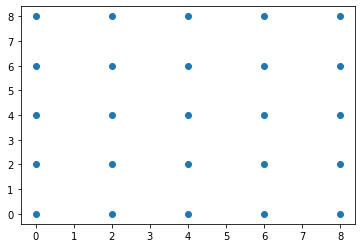

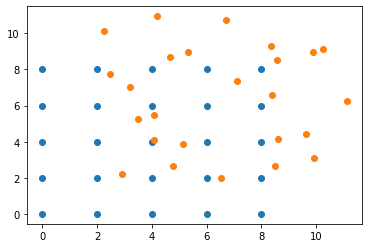

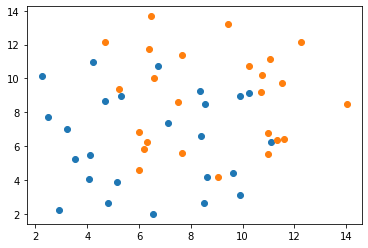

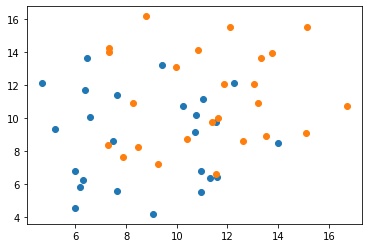

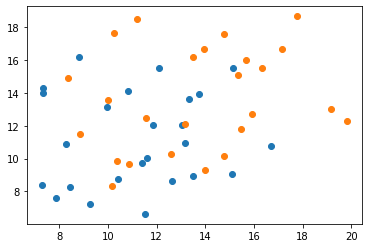

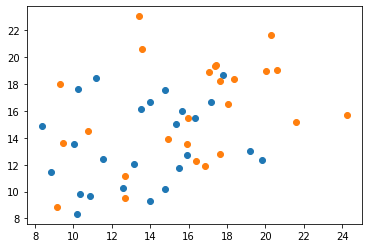

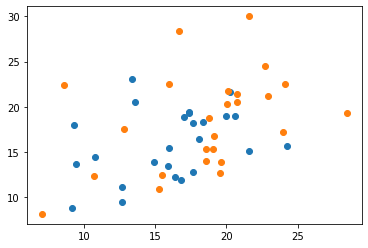

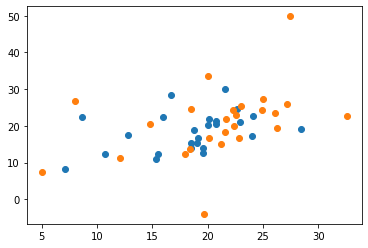

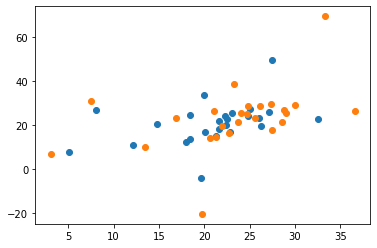

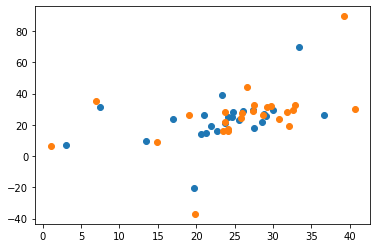

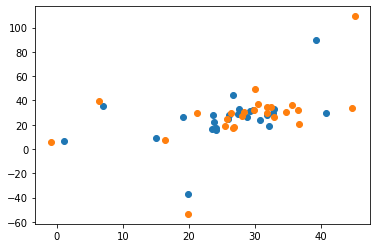

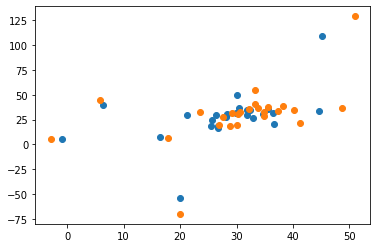

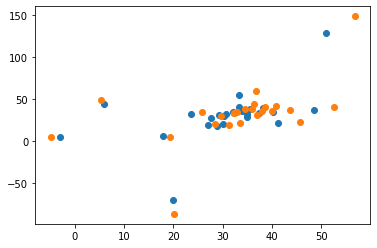

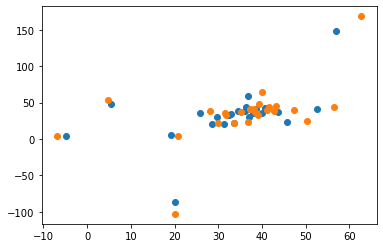

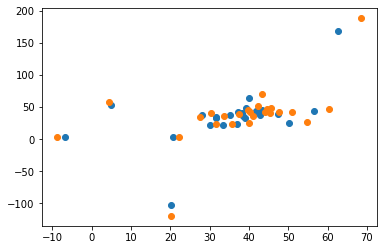

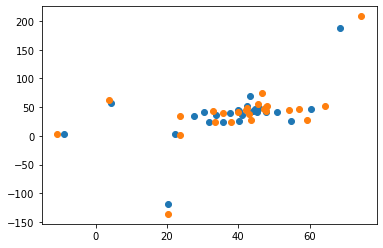

In [69]:
########################################
## Initiialiszing constants and Lists that will be used
########################################

G=6.67e-11
G=1                
m=1               #mass of particle in kg
box_l=10          #length of sim box side
lin_density= .5   #linear density (used to calculate area density later)
box_area=box_l**2 #area of initial box
dt=.5  #timestep

########################################
## Initiialiszing positions and velcities of particles at t=0
########################################   
initpos_x, initpos_y, initvel_x, initvel_y=initialize_pos_vel1(box_l, lin_density)
plt.scatter(initpos_x, initpos_y)
plt.show()
for t in range(15):
    list_fx,list_fy=calc_netforce(initpos_x, initpos_y)
    plt.scatter(initpos_x, initpos_y)
    newpos_x, newpos_y, newvel_x, newvel_y=calc_new_pos_vel(initpos_x, initpos_y, initvel_x, initvel_y, list_fx, list_fy)
    plt.scatter(newpos_x, newpos_y)
    plt.show()
    initpos_x=newpos_x
    initpos_y=newpos_y
    initvel_x=newvel_x
    initvel_y=newvel_y
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.show()

In [72]:
a=np.array([1,34,4,5,67,5])
print(a[[True,False,True,True,False,True]])

[1 4 5 5]


In [ ]:
for t in range(10):
    plt.scatter(initpos, np.zeros_like(initpos))
    initpos, initvel=eval_step(initpos,initvel)
    plt.scatter(initpos, np.zeros_like(initpos))
    #plt.xlim([-25,25])
    plt.show()

In [35]:
########################################
#### Initializing pos and vel lists for a galaxy 
##input: box length, lin density
##output: initpos_x, initpos_y, initvel_x, initvel_y
########################################
def initialize_pos_vel1(r, n_theta):
    pos_x=np.arange(0,box_l,1/lin_density)
    pos_y=np.arange(0,box_l,1/lin_density)
    initpos_x, initpos_y= np.meshgrid(pos_x,pos_y)
    initpos_x=initpos_x.flatten()
    initpos_y=initpos_y.flatten()
    #print(initpos_x,initpos_y, len(initpos_x))
    area_density=lin_density**2
    initvel_x=(np.random.randn(1,int((box_l**2)*area_density))+5).flatten()
    initvel_y=(np.random.randn(1,int((box_l**2)*area_density))+5).flatten()
    print(initvel_x, len(initvel_x))
    #print("length of vel and pos: {}, {}".format(len(initpos_x),len(initvel_x)))
    return initpos_x, initpos_y, initvel_x, initvel_y
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

########################################
#### Initializing pos and vel lists for a galaxy 
##input: box length, lin density
##output: initpos_x, initpos_y, initvel_x, initvel_y
########################################
def initialize_pos_vel2(r, rho_s):
    pos_x=np.arange(0,box_l,1/lin_density)
    pos_y=np.arange(0,box_l,1/lin_density)
    initpos_x, initpos_y= np.meshgrid(pos_x,pos_y)
    initpos_x=initpos_x.flatten()
    initpos_y=initpos_y.flatten()
    #print(initpos_x,initpos_y, len(initpos_x))
    area_density=lin_density**2
    initvel_x=(np.random.randn(1,int((box_l**2)*area_density))+5).flatten()
    initvel_y=(np.random.randn(1,int((box_l**2)*area_density))+5).flatten()
    print(initvel_x, len(initvel_x))
    #print("length of vel and pos: {}, {}".format(len(initpos_x),len(initvel_x)))
    return initpos_x, initpos_y, initvel_x, initvel_y
##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  ##  

initpos_x, initpos_y, initvel_x, initvel_y=initialize_pos_vel1(box_l, lin_density)

[3.93277696 3.89424847 4.80188923 6.64720566 6.86320076 5.37941153
 6.55128517 5.83902314 5.12598141 5.1833011  5.04789012 4.74752269
 5.93916968 6.14610539 3.85908486 5.77391933 6.14610897 5.21174766
 3.89544103 7.20483455 5.07383565 5.853426   5.35591721 4.03590449
 4.95952771] 25


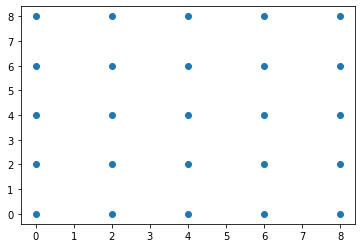

In [36]:
plt.scatter(initpos_x, initpos_y)
plt.show()

In [103]:
thetas=np.linspace(0,2*np.pi,5,endpoint=False)
r=np.linspace(1,10,5)
r,thetas=np.meshgrid(r,thetas)

rx=(r*np.cos(thetas)).flatten()
ry=(r*np.sin(thetas)).flatten()
plt.scatter(rx,ry)
print(len(rx))

[ 1.    3.25  5.5   7.75 10.  ]


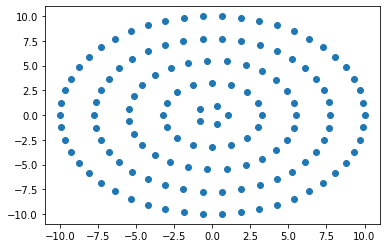

In [129]:
thetas=np.linspace(0,2*np.pi,5,endpoint=False)
r=np.linspace(1,10,5)
print(r)
rho_s=5/2/np.pi
thetas=np.array([])
rlist=np.array([])
vlist=np.array([])
for i in range(len(r)):
    n=2*np.pi*r[i]*rho_s
    #print(int(n))
    theta=np.linspace(0,2*np.pi,int(n),endpoint=False)
    #print(theta)
    thetas=np.concatenate((thetas,theta))
    #print(thetas)
    rlist=np.concatenate((rlist,r[i]*np.ones(int(n))))
    #print(rlist)
    if i==0:
        vlist=np.concatenate((vlist,np.zeros(int(n))))
    else:
        vlist=np.concatenate((vlist,r[i-1]*np.ones(int(n))))
rx=(rlist*np.cos(thetas))
ry=(rlist*np.sin(thetas))
vx=-(vlist*np.sin(thetas))
vy=(vlist*np.cos(thetas))
#r,thetas=np.meshgrid(r,thetas)

#rx=(r*np.cos(thetas)).flatten()
#ry=(r*np.sin(thetas)).flatten()
plt.scatter(rx,ry)
#print(len(rx))

[0. 2. 4. 6. 8. 0. 2. 4. 6. 8. 0. 2. 4. 6. 8. 0. 2. 4. 6. 8. 0. 2. 4. 6.
 8.] [0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 6. 6. 6. 6. 6. 8. 8. 8. 8.
 8.] 25
length of vel and pos: 25, 25


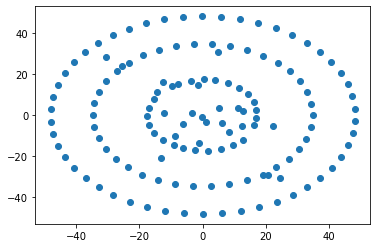

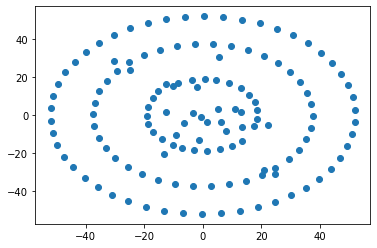

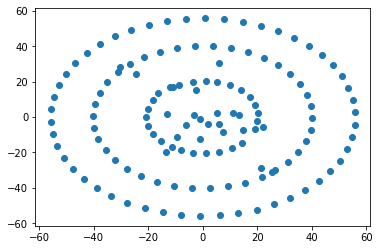

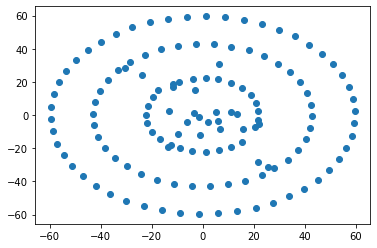

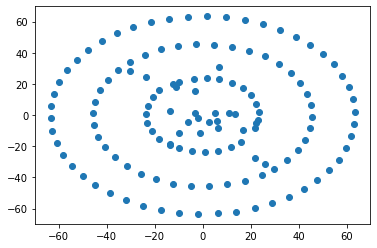

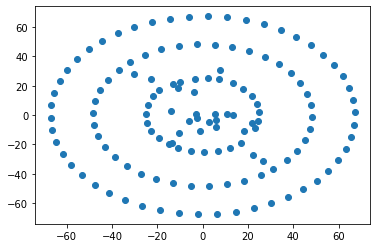

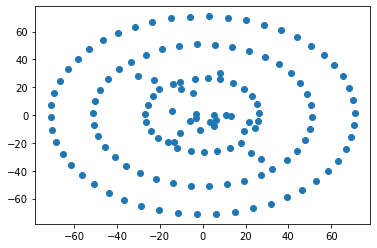

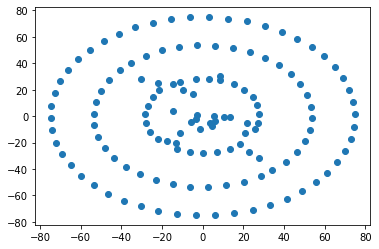

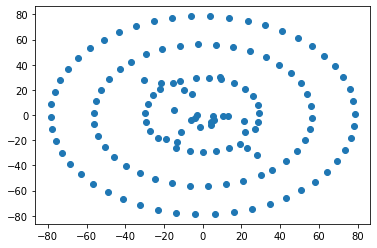

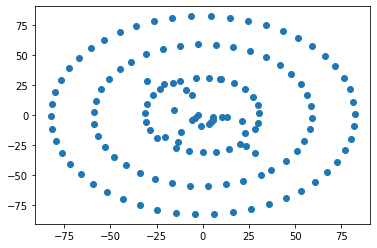

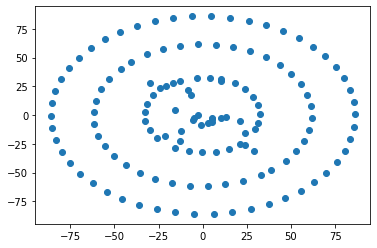

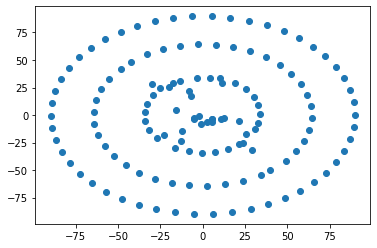

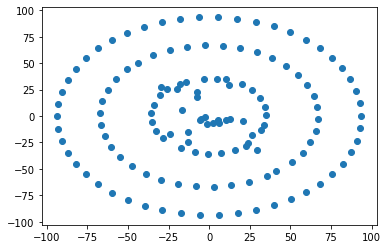

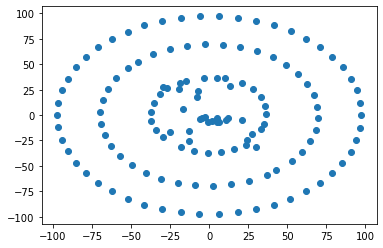

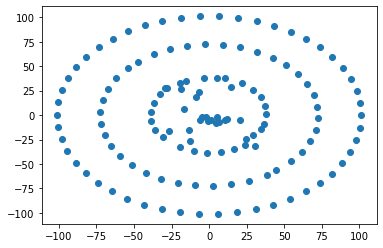

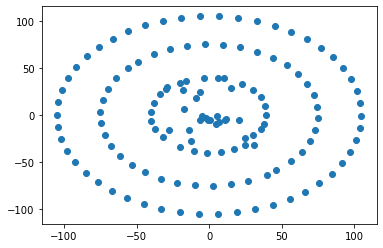

In [131]:
########################################
## Initiialiszing constants and Lists that will be used
########################################

G=6.67e-11
G=1                
m=1               #mass of particle in kg
box_l=10          #length of sim box side
lin_density= .5   #linear density (used to calculate area density later)
box_area=box_l**2 #area of initial box
dt=.5  #timestep

########################################
## Initiialiszing positions and velcities of particles at t=0
########################################   
initpos_x, initpos_y, initvel_x, initvel_y=initialize_pos_vel(box_l, lin_density)
initvel_x, initvel_y=vx,vy
plt.scatter(rx, ry)
plt.show()
for t in range(15):
    list_fx,list_fy=calc_netforce(rx, ry)
    #plt.scatter(rx, ry)
    newpos_x, newpos_y, newvel_x, newvel_y=calc_new_pos_vel(rx, ry, initvel_x, initvel_y, list_fx, list_fy)
    plt.scatter(newpos_x, newpos_y)
    plt.savefig('{}.png'.format(t))
    plt.show()
    rx=newpos_x
    ry=newpos_y
    initvel_x=newvel_x
    initvel_y=newvel_y
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.show()
filenames=['{}.png'.format(t) for t in range(15)]
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)